In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv("telco_churn.csv")  # Replace with the correct filename
print("Dataset loaded successfully!")
print(data.head())


Dataset loaded successfully!
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [3]:
# Check dataset structure
print(data.info())

# Summary statistics
print(data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipykernel_132/615758299.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=data, palette="coolwarm")


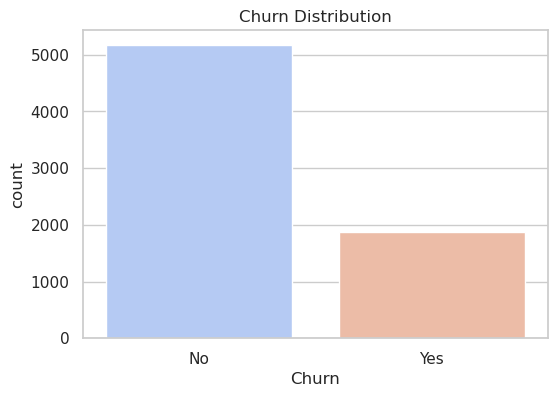

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=data, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()


In [5]:
!pip install seaborn
!pip install matplotlib

In [7]:
# Save processed data
data = data.dropna()  # Example preprocessing step
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
data.to_csv("processed_telco_churn.csv", index=False)
print("Processed file saved locally.")


Processed file saved locally.


In [9]:
import boto3
import pandas as pd

# Preprocess Data
data = pd.read_csv("telco_churn.csv")
data = data.dropna()  # Drop missing values
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Save processed file locally
processed_file = "processed_telco_churn.csv"
data.to_csv(processed_file, index=False)
print("Processed file saved locally.")

# S3 Configuration
bucket_name = "customerchurner"  # Replace with your bucket name
s3_key = "processed/processed_telco_churn.csv"  # Path in S3 bucket

# Upload processed file to S3
s3 = boto3.client('s3')
s3.upload_file(processed_file, bucket_name, s3_key)

print(f"Processed file uploaded to s3://{bucket_name}/{s3_key}")


Processed file saved locally.
Processed file uploaded to s3://customerchurner/processed/processed_telco_churn.csv


In [16]:
import pandas as pd
import boto3

# Local file path
processed_file = "processed_telco_churn.csv"

# Load the dataset
data = pd.read_csv(processed_file)
print("Original target labels:", data['Churn'].unique())

# Correct the target labels
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the correction
print("Corrected target labels:", data['Churn'].unique())

# Overwrite the processed file locally
data.to_csv(processed_file, index=False)
print(f"Corrected dataset saved locally as {processed_file}.")

# Upload the corrected file to S3
bucket_name = "customerchurner"  # Replace with your S3 bucket name
processed_key = "processed/processed_telco_churn.csv"  # S3 key for the file

# Upload to S3
s3 = boto3.client('s3')
s3.upload_file(processed_file, bucket_name, processed_key)
print(f"Corrected dataset uploaded to s3://{bucket_name}/{processed_key}")


Original target labels: [0]
Corrected target labels: [0]
Corrected dataset saved locally as processed_telco_churn.csv.
Corrected dataset uploaded to s3://customerchurner/processed/processed_telco_churn.csv


In [19]:
import pandas as pd

# Load the raw dataset
raw_file = "telco_churn.csv"  # Replace with your raw dataset file path
raw_data = pd.read_csv(raw_file)

# Check the first few rows
print("Raw Data Sample:")
print(raw_data.head())

# Check unique values in the 'Churn' column
print("Unique values in 'Churn' column:", raw_data['Churn'].unique())

# Count 'Yes' and 'No' values
print("Churn value counts:")
print(raw_data['Churn'].value_counts())


Raw Data Sample:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies    

In [1]:
import pandas as pd

# Load the dataset
raw_file = "telco_churn.csv"  # Replace with the actual path
raw_data = pd.read_csv(raw_file)

# Preview the dataset
print("Dataset sample:")
print(raw_data.head())

# Check data types and non-null values
print("Data info:")
print(raw_data.info())

# Check the unique values in 'Churn' column
print("Unique values in 'Churn':", raw_data['Churn'].unique())


Dataset sample:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

In [2]:
# Check for missing values
print("Missing values per column:")
print(raw_data.isnull().sum())

# Drop rows with missing values
raw_data = raw_data.dropna()
print(f"Shape after dropping missing values: {raw_data.shape}")


Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Shape after dropping missing values: (7043, 21)


In [3]:
# Drop unnecessary columns
data = raw_data.drop(columns=["customerID"])  # 'customerID' is not useful for prediction

# Encode the 'Churn' column
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Verify the unique values in 'Churn'
print("Unique values in 'Churn' after encoding:", data['Churn'].unique())


Unique values in 'Churn' after encoding: [0 1]


In [4]:
# Check data type of TotalCharges
print(data['TotalCharges'].dtype)

# Convert TotalCharges to numeric, coercing errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for rows where TotalCharges could not be converted
print("Number of missing TotalCharges after conversion:", data['TotalCharges'].isnull().sum())

# Drop rows with missing TotalCharges
data = data.dropna(subset=['TotalCharges'])


object
Number of missing TotalCharges after conversion: 11


In [5]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# One-hot encode the categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verify the shape after one-hot encoding
print("Shape after encoding:", data.shape)


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Shape after encoding: (7032, 31)


In [6]:
# Save the processed data locally
processed_file = "processed_telco_churn.csv"
data.to_csv(processed_file, index=False)

print(f"Preprocessed dataset saved to {processed_file}.")


Preprocessed dataset saved to processed_telco_churn.csv.


In [7]:
# Reload and verify the processed file
processed_data = pd.read_csv(processed_file)

# Verify target column
print("Unique values in 'Churn':", processed_data['Churn'].unique())
print("Churn value counts:\n", processed_data['Churn'].value_counts())

# Check the dataset structure
print("Final dataset shape:", processed_data.shape)


Unique values in 'Churn': [0 1]
Churn value counts:
 Churn
0    5163
1    1869
Name: count, dtype: int64
Final dataset shape: (7032, 31)


In [8]:
import boto3

bucket_name = "customerchurner"  # Your bucket name
processed_key = "processed/processed_telco_churn.csv"

s3 = boto3.client('s3')
s3.upload_file(processed_file, bucket_name, processed_key)

print(f"Preprocessed dataset uploaded to s3://{bucket_name}/{processed_key}")


Preprocessed dataset uploaded to s3://customerchurner/processed/processed_telco_churn.csv


In [9]:
import sagemaker
from sagemaker import Session
from sagemaker.inputs import TrainingInput

# SageMaker session and role
session = sagemaker.Session()
role = sagemaker.get_execution_role()  # IAM role for SageMaker

# S3 paths
bucket_name = "customerchurner"  # Replace with your bucket name
processed_key = "processed/processed_telco_churn.csv"
s3_input_path = f"s3://{bucket_name}/{processed_key}"
s3_output_path = f"s3://{bucket_name}/model-output/"

# Use the built-in XGBoost container image
xgboost_image_uri = sagemaker.image_uris.retrieve(
    framework="xgboost",
    region=session.boto_region_name,
    version="1.3-1"
)

# Define the XGBoost estimator
xgboost_estimator = sagemaker.estimator.Estimator(
    image_uri=xgboost_image_uri,
    role=role,
    instance_count=1,
    instance_type="ml.m5.large",
    output_path=s3_output_path
)

# Set hyperparameters for XGBoost
xgboost_estimator.set_hyperparameters(
    objective="binary:logistic",
    num_round=50,
    max_depth=5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    subsample=0.8
)

# Define training input
train_input = TrainingInput(s3_input_path, content_type="csv")

# Launch the training job
xgboost_estimator.fit({"train": train_input})
print("Training job started!")


sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-12-15-22-15-31-828


2024-12-15 22:15:34 Starting - Starting the training job...
2024-12-15 22:15:47 Starting - Preparing the instances for training...
2024-12-15 22:16:14 Downloading - Downloading input data...
2024-12-15 22:16:55 Downloading - Downloading the training image...
2024-12-15 22:17:35 Training - Training image download completed. Training in progress..[2024-12-15 22:17:40.504 ip-10-0-106-112.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-12-15 22:17:40.535 ip-10-0-106-112.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-12-15:22:17:40:INFO] Imported framework sagemaker_xgboost_container.training
[2024-12-15:22:17:40:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2024-12-15:22:17:40:INFO] No GPUs detected (normal if no gpus installed)
[2024-12-15:22:17:40:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-12-15:22:17:40:INFO] Determined delimiter of CSV input is ','
[

In [10]:
# Deploy the model
predictor = xgboost_estimator.deploy(
    initial_instance_count=1,  # Number of instances for deployment
    instance_type="ml.m5.large",  # Instance type for hosting
    endpoint_name="xgboost-churn-predictor"  # Unique endpoint name
)

print("Model deployed successfully!")


INFO:sagemaker:Creating model with name: sagemaker-xgboost-2024-12-15-22-42-37-744
INFO:sagemaker:Creating endpoint-config with name xgboost-churn-predictor
INFO:sagemaker:Creating endpoint with name xgboost-churn-predictor


------!Model deployed successfully!


In [15]:
import json

# Sample input in CSV format (as a single instance)
sample_input_csv = "0.0,45.0,42.3,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0"

# Send the input to the endpoint
response = predictor.predict(
    sample_input_csv,  # CSV-formatted input
    initial_args={"ContentType": "text/csv"}  # Specify content type
)

# Print the prediction response
print("Prediction response:", response)


Prediction response: b'0.299439936876297\n'
